In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


LOADING OF THE VARIOUS DATASET INCLUDING THE NORMAL CONDITION WHICH IS THE HEALTHY ONE , 
AND ALSO THE AB_FAULT WHICH IS THE LINE TO LINE FAULT(L-L) ON PHASE A AND B,
FAULT_AG WHICH IS THE LINE TO GROUND FAULT(L-G) ON PHASE A AND GROUND,
FAULT_ABG WHICH IS THE LINE TO LINE TO GROUND FAULT(L-L-G) ON PHASE A AND B AND GROUND

In [45]:
Healthy=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Pictures\Final year data\Fault_Data_Normal.csv")
fault_AB=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Pictures\Final year data\Fault_Data_AB.csv")
fault_AG=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Pictures\Final year data\Fault_Data_AG.csv")
fault_ABG=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\Pictures\Final year data\Fault_Data_ABG.csv")




MERGING OF HEALTHY DATASET TO THE FAULTY ONES SO THE MODEL CAN LEARN BOTH FAULT CONDITIONS (L-L, L-G, L-L-G) FOR EFFECTIVE MODEL TRAINING

In [46]:

merged = pd.concat([Healthy, fault_AB, fault_AG, fault_ABG], ignore_index=True)

print("Merged dataset shape:", merged.shape)


Merged dataset shape: (608, 9)


In [47]:
merged.head(n=600)


,Va,Vb,Vc,Ia,Ib,Ic,Distance,Resistance,Label
0,14471.279038,14471.388911,14471.415261,6.022849,6.028881,6.035360,5,0.001,0
1,14471.279038,14471.388911,14471.415261,6.022849,6.028881,6.035360,5,1.000,0
2,14471.279038,14471.388911,14471.415261,6.022849,6.028881,6.035360,5,5.000,0
3,14471.279038,14471.388911,14471.415261,6.022849,6.028881,6.035360,5,10.000,0
4,14471.279038,14471.388911,14471.415261,6.022849,6.028881,6.035360,5,20.000,0
...,...,...,...,...,...,...,...,...,...
595,14461.168960,14471.396695,14471.387195,22.448397,6.033323,6.033989,90,10.000,3
596,14461.168960,14471.396695,14471.387195,22.448397,6.033323,6.033989,90,20.000,3
597,14461.168960,14471.396695,14471.387195,22.448397,6.033323,6.033989,90,50.000,3
598,14461.168960,14471.396695,14471.387195,22.448397,6.033323,6.033989,90,80.000,3


In [48]:
import os
import pandas as pd

os.makedirs("Fault_Detection_Classification", exist_ok=True)

# Save the merged dataset
merged.to_csv("Fault_Detection_Classification/merged_raw.csv", index=False)
print("Merged dataset saved to Fault_Detection_Classification/merged_raw.csv")



Merged dataset saved to Fault_Detection_Classification/merged_raw.csv


In [49]:
merged = merged.drop_duplicates()
print("Shape after removing duplicates:", merged.shape)

Shape after removing duplicates: (608, 9)


DATA CLEANING AND PREPROCESSING

In [50]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Va          608 non-null    float64
 1   Vb          608 non-null    float64
 2   Vc          608 non-null    float64
 3   Ia          608 non-null    float64
 4   Ib          608 non-null    float64
 5   Ic          608 non-null    float64
 6   Distance    608 non-null    int64  
 7   Resistance  608 non-null    float64
 8   Label       608 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 42.9 KB


In [51]:
merged.isnull().sum()

Va            0
Vb            0
Vc            0
Ia            0
Ib            0
Ic            0
Distance      0
Resistance    0
Label         0
dtype: int64

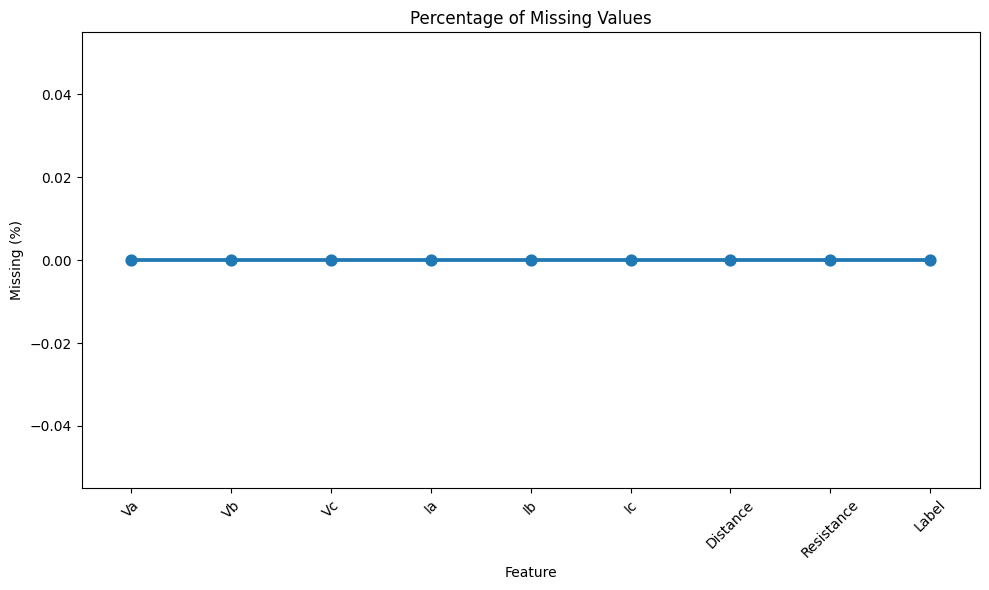

In [52]:
missing = pd.DataFrame((merged.isnull().sum() / len(merged)) * 100).reset_index()
missing.columns = ["Feature", "Missing (%)"]

plt.figure(figsize=(10, 6))
sns.pointplot(x="Feature", y="Missing (%)", data=missing)
plt.xticks(rotation=45)
plt.title("Percentage of Missing Values")
plt.ylabel("Missing (%)")
plt.tight_layout()
plt.show()


In [53]:
merged = merged.sample(frac=1, random_state=42).reset_index(drop=True)
merged


,Va,Vb,Vc,Ia,Ib,Ic,Distance,Resistance,Label
0,14471.283920,14471.394911,14471.421167,6.023837,6.030013,6.036512,70,50.000,0
1,14471.280463,14471.390462,14471.416803,6.023126,6.029174,6.035656,10,5.000,0
2,14471.283295,14471.393719,14471.421140,6.023721,6.029849,6.036381,25,0.001,2
3,14471.285586,14471.396353,14471.422632,6.024140,6.030286,6.036782,50,50.000,0
4,14456.318953,14471.396573,14471.388054,33.899947,6.031054,6.031961,55,5.000,3
...,...,...,...,...,...,...,...,...,...
603,14471.285560,14471.396254,14471.422539,6.024131,6.030267,6.036762,45,100.000,0
604,14471.283920,14471.394911,14471.421167,6.023837,6.030013,6.036512,70,5.000,0
605,14471.282569,14471.393716,14471.421183,6.023641,6.029859,6.036402,75,80.000,2
606,14460.678947,14471.397904,14471.388490,23.559232,6.033508,6.034191,85,10.000,1


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ["Va", "Vb", "Vc", "Ia", "Ib", "Ic"]
merged[cols_to_scale] = scaler.fit_transform(merged[cols_to_scale])



In [55]:
merged

,Va,Vb,Vc,Ia,Ib,Ic,Distance,Resistance,Label
0,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,50.000,0
1,0.816926,-0.320392,-0.115345,-0.692256,-0.499735,-0.118910,10,5.000,0
2,0.817162,-0.281564,-0.060327,-0.692237,-0.404217,-0.006092,25,0.001,2
3,0.817353,-0.250171,-0.041404,-0.692224,-0.342313,0.056241,50,50.000,0
4,-0.428283,-0.247554,-0.480034,0.199813,-0.233496,-0.693595,55,5.000,3
...,...,...,...,...,...,...,...,...,...
603,0.817350,-0.251348,-0.042574,-0.692224,-0.344946,0.053184,45,100.000,0
604,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,5.000,0
605,0.817102,-0.281609,-0.059775,-0.692240,-0.402725,-0.002798,75,80.000,2
606,-0.065411,-0.231691,-0.474504,-0.131094,0.113903,-0.346701,85,10.000,1


In [56]:
import numpy as np

merged["Va_Vb_diff"] = merged["Va"] - merged["Vb"]
merged["Vb_Vc_diff"] = merged["Vb"] - merged["Vc"]
merged["Ia_Ib_diff"] = merged["Ia"] - merged["Ib"]
merged["Ib_Ic_diff"] = merged["Ib"] - merged["Ic"]
merged


,Va,Vb,Vc,Ia,Ib,Ic,Distance,Resistance,Label,Va_Vb_diff,Vb_Vc_diff,Ia_Ib_diff,Ib_Ic_diff
0,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,50.000,0,1.084579,-0.207389,-0.311332,-0.395093
1,0.816926,-0.320392,-0.115345,-0.692256,-0.499735,-0.118910,10,5.000,0,1.137318,-0.205047,-0.192521,-0.380824
2,0.817162,-0.281564,-0.060327,-0.692237,-0.404217,-0.006092,25,0.001,2,1.098726,-0.221237,-0.288020,-0.398126
3,0.817353,-0.250171,-0.041404,-0.692224,-0.342313,0.056241,50,50.000,0,1.067524,-0.208767,-0.349910,-0.398555
4,-0.428283,-0.247554,-0.480034,0.199813,-0.233496,-0.693595,55,5.000,3,-0.180728,0.232480,0.433309,0.460099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.817350,-0.251348,-0.042574,-0.692224,-0.344946,0.053184,45,100.000,0,1.068698,-0.208773,-0.347278,-0.398130
604,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,5.000,0,1.084579,-0.207389,-0.311332,-0.395093
605,0.817102,-0.281609,-0.059775,-0.692240,-0.402725,-0.002798,75,80.000,2,1.098710,-0.221834,-0.289515,-0.399927
606,-0.065411,-0.231691,-0.474504,-0.131094,0.113903,-0.346701,85,10.000,1,0.166279,0.242814,-0.244997,0.460604


In [57]:
merged["Ia_Ib_ratio"] = np.where(merged["Ib"] != 0, merged["Ia"]/merged["Ib"], 0)
merged["Ib_Ic_ratio"] = np.where(merged["Ic"] != 0, merged["Ib"]/merged["Ic"], 0)
merged

,Va,Vb,Vc,Ia,Ib,Ic,Distance,Resistance,Label,Va_Vb_diff,Vb_Vc_diff,Ia_Ib_diff,Ib_Ic_diff,Ia_Ib_ratio,Ib_Ic_ratio
0,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,50.000,0,1.084579,-0.207389,-0.311332,-0.395093,1.817356,-26.839765
1,0.816926,-0.320392,-0.115345,-0.692256,-0.499735,-0.118910,10,5.000,0,1.137318,-0.205047,-0.192521,-0.380824,1.385247,4.202616
2,0.817162,-0.281564,-0.060327,-0.692237,-0.404217,-0.006092,25,0.001,2,1.098726,-0.221237,-0.288020,-0.398126,1.712536,66.355859
3,0.817353,-0.250171,-0.041404,-0.692224,-0.342313,0.056241,50,50.000,0,1.067524,-0.208767,-0.349910,-0.398555,2.022192,-6.086547
4,-0.428283,-0.247554,-0.480034,0.199813,-0.233496,-0.693595,55,5.000,3,-0.180728,0.232480,0.433309,0.460099,-0.855742,0.336647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.817350,-0.251348,-0.042574,-0.692224,-0.344946,0.053184,45,100.000,0,1.068698,-0.208773,-0.347278,-0.398130,2.006758,-6.485933
604,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,5.000,0,1.084579,-0.207389,-0.311332,-0.395093,1.817356,-26.839765
605,0.817102,-0.281609,-0.059775,-0.692240,-0.402725,-0.002798,75,80.000,2,1.098710,-0.221834,-0.289515,-0.399927,1.718889,143.925035
606,-0.065411,-0.231691,-0.474504,-0.131094,0.113903,-0.346701,85,10.000,1,0.166279,0.242814,-0.244997,0.460604,-1.150928,-0.328533


In [58]:
merged["V_mean"] = merged[["Va","Vb","Vc"]].mean(axis=1)
merged["I_mean"] = merged[["Ia","Ib","Ic"]].mean(axis=1)
merged["V_std"] = merged[["Va","Vb","Vc"]].std(axis=1)
merged["I_std"] = merged[["Ia","Ib","Ic"]].std(axis=1)
merged

,Va,Vb,Vc,Ia,Ib,Ic,Distance,Resistance,Label,Va_Vb_diff,Vb_Vc_diff,Ia_Ib_diff,Ib_Ic_diff,Ia_Ib_ratio,Ib_Ic_ratio,V_mean,I_mean,V_std,I_std
0,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,50.000,0,1.084579,-0.207389,-0.311332,-0.395093,1.817356,-26.839765,0.163291,-0.352981,0.575729,0.354039
1,0.816926,-0.320392,-0.115345,-0.692256,-0.499735,-0.118910,10,5.000,0,1.137318,-0.205047,-0.192521,-0.380824,1.385247,4.202616,0.127063,-0.436967,0.606172,0.291781
2,0.817162,-0.281564,-0.060327,-0.692237,-0.404217,-0.006092,25,0.001,2,1.098726,-0.221237,-0.288020,-0.398126,1.712536,66.355859,0.158424,-0.367515,0.581110,0.344542
3,0.817353,-0.250171,-0.041404,-0.692224,-0.342313,0.056241,50,50.000,0,1.067524,-0.208767,-0.349910,-0.398555,2.022192,-6.086547,0.175259,-0.326099,0.565782,0.374496
4,-0.428283,-0.247554,-0.480034,0.199813,-0.233496,-0.693595,55,5.000,3,-0.180728,0.232480,0.433309,0.460099,-0.855742,0.336647,-0.385290,-0.242426,0.122057,0.446771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,0.817350,-0.251348,-0.042574,-0.692224,-0.344946,0.053184,45,100.000,0,1.068698,-0.208773,-0.347278,-0.398130,2.006758,-6.485933,0.174476,-0.327995,0.566447,0.372993
604,0.817214,-0.267365,-0.059976,-0.692233,-0.380901,0.014192,70,5.000,0,1.084579,-0.207389,-0.311332,-0.395093,1.817356,-26.839765,0.163291,-0.352981,0.575729,0.354039
605,0.817102,-0.281609,-0.059775,-0.692240,-0.402725,-0.002798,75,80.000,2,1.098710,-0.221834,-0.289515,-0.399927,1.718889,143.925035,0.158573,-0.365921,0.580989,0.346191
606,-0.065411,-0.231691,-0.474504,-0.131094,0.113903,-0.346701,85,10.000,1,0.166279,0.242814,-0.244997,0.460604,-1.150928,-0.328533,-0.257202,-0.121297,0.205736,0.230458


In [59]:
merged.to_csv("Fault_Detection_Classification/merged_preprocessed.csv", index=False)
print("Preprocessed dataset saved to Fault_Detection_Classification/merged_preprocessed.csv")


Preprocessed dataset saved to Fault_Detection_Classification/merged_preprocessed.csv


TRAINING OF VARIOUS MODEL TO PICK THE ONE WITH THE MOST ACCURACY

In [60]:
from sklearn.model_selection import train_test_split

# Define features and targets
X = merged.drop(columns=["Label", "Distance", "Resistance"])
y_class = merged["Label"]
y_dist = merged["Distance"]
y_res = merged["Resistance"]

# Split for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Split for regression (same features, different targets)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y_dist, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_res, test_size=0.2, random_state=42)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Define models
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results_class = []
trained_classifiers = {}  # ✅ Store trained models here

for name, model in classifiers.items():
    model.fit(X_train_c, y_train_c)
    preds = model.predict(X_test_c)
    acc = accuracy_score(y_test_c, preds)
    f1 = f1_score(y_test_c, preds, average='weighted')
    results_class.append({"Model": name, "Accuracy": acc, "F1 Score": f1})
    trained_classifiers[name] = model  # ✅ Save trained model

df_class_results = pd.DataFrame(results_class).sort_values(by="Accuracy", ascending=False)
print("Classification Model Comparison:")
print(df_class_results)


Classification Model Comparison:
                 Model  Accuracy  F1 Score
0        Random Forest  1.000000  1.000000
2                  KNN  1.000000  1.000000
4              XGBoost  1.000000  1.000000
3                  SVC  0.459016  0.313225
1  Logistic Regression  0.450820  0.405931


In [71]:
import joblib

# ✅ Select best model by name
best_model_name = df_class_results.iloc[0]["Model"]
best_classifier = trained_classifiers[best_model_name]

# ✅ Save it
joblib.dump(best_classifier, "Fault_Detection_Classification/classifier.pkl")
print(f"Best classifier '{best_model_name}' saved successfully.")


Best classifier 'Random Forest' saved successfully.


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define models
regressors = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor()
}

# Store results and trained models
results_dist = []
trained_dist = {}

results_res = []
trained_res = {}

# Distance regression
for name, model in regressors.items():
    model.fit(X_train_d, y_train_d)
    preds = model.predict(X_test_d)
    mse = mean_squared_error(y_test_d, preds)
    r2 = r2_score(y_test_d, preds)
    results_dist.append({"Model": name, "MSE": mse, "R2 Score": r2})
    trained_dist[name] = model

df_dist_results = pd.DataFrame(results_dist).sort_values(by="R2 Score", ascending=False)
print("Distance Regression Comparison:")
print(df_dist_results)

# Resistance regression
for name, model in regressors.items():
    model.fit(X_train_r, y_train_r)
    preds = model.predict(X_test_r)
    mse = mean_squared_error(y_test_r, preds)
    r2 = r2_score(y_test_r, preds)
    results_res.append({"Model": name, "MSE": mse, "R2 Score": r2})
    trained_res[name] = model

df_res_results = pd.DataFrame(results_res).sort_values(by="R2 Score", ascending=False)
print("Resistance Regression Comparison:")
print(df_res_results)


Distance Regression Comparison:
               Model           MSE  R2 Score
4            XGBoost  1.282275e-07  1.000000
0      Random Forest  4.283197e-01  0.999449
2                KNN  4.406557e+01  0.943276
1  Linear Regression  3.770988e+02  0.514575
3                SVR  6.728212e+02  0.133903
Resistance Regression Comparison:
               Model          MSE  R2 Score
1  Linear Regression  1377.553028 -0.015935
3                SVR  1765.493818 -0.302039
4            XGBoost  1816.547968 -0.339691
0      Random Forest  1823.112166 -0.344532
2                KNN  1883.857553 -0.389331


In [74]:

# Select best models by name
best_dist_name = df_dist_results.iloc[0]["Model"]
best_regressor_dist = trained_dist[best_dist_name]

best_res_name = df_res_results.iloc[0]["Model"]
best_regressor_res = trained_res[best_res_name]

print(f"Best distance regressor: {best_dist_name}")
print(f"Best resistance regressor: {best_res_name}")


Best distance regressor: XGBoost
Best resistance regressor: Linear Regression


In [75]:
import joblib

joblib.dump(best_regressor_dist, "Fault_Detection_Classification/reg_distance.pkl")
joblib.dump(best_regressor_res, "Fault_Detection_Classification/reg_resistance.pkl")

print("Best regressors saved successfully.")


Best regressors saved successfully.
